### Preprocessing River Level Data

This notebook cleans and analyses river level data:
- Imports and formats time series data;
- Visualises patterns by station and quality;
- Investigates distributions and statistics;
- Resamples data to hourly intervals;
- Prepares a clean dataset for modelling.


In [0]:
#Imports all modules and libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [0]:
# CSV into a new DataFrame which can be replicated for the other datasets.
df = pd.read_csv(os.path.join("Data", "Imported_API_Level.csv")) 
df

,measure,date,dateTime,value,quality,station,qcode
0,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19T00:00:00,2.078,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b,NaN
1,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19T00:15:00,2.107,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b,NaN
2,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19T00:30:00,2.148,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b,NaN
3,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19T00:45:00,2.198,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b,NaN
4,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19T01:00:00,2.236,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b,NaN
...,...,...,...,...,...,...,...
346171,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-11-19,2024-11-19T01:00:00,1.719,Good,ce5176cf-1523-4dbe-855f-17a0efffbe02,NaN
346172,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-11-20,2024-11-20T12:45:00,2.270,Good,ce5176cf-1523-4dbe-855f-17a0efffbe02,NaN
346173,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-11-21,2024-11-21T08:45:00,3.924,Good,ce5176cf-1523-4dbe-855f-17a0efffbe02,NaN
346174,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-11-23,2024-11-23T06:45:00,1.450,Good,ce5176cf-1523-4dbe-855f-17a0efffbe02,NaN


In [0]:
#Checking the data types - dateTime needs to be set as a date and time. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346176 entries, 0 to 346175
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   measure   346176 non-null  object 
 1   date      346176 non-null  object 
 2   dateTime  346176 non-null  object 
 3   value     346176 non-null  float64
 4   quality   346176 non-null  object 
 5   station   346176 non-null  object 
 6   qcode     21392 non-null   object 
dtypes: float64(1), object(6)
memory usage: 18.5+ MB


In [0]:
print(df.head())  # First 5 rows
print(df.tail())  # Last 5 rows


                                             measure  ... qcode
0  {'@id': 'http://environment.data.gov.uk/hydrol...  ...   NaN
1  {'@id': 'http://environment.data.gov.uk/hydrol...  ...   NaN
2  {'@id': 'http://environment.data.gov.uk/hydrol...  ...   NaN
3  {'@id': 'http://environment.data.gov.uk/hydrol...  ...   NaN
4  {'@id': 'http://environment.data.gov.uk/hydrol...  ...   NaN

[5 rows x 7 columns]
                                                  measure  ... qcode
346171  {'@id': 'http://environment.data.gov.uk/hydrol...  ...   NaN
346172  {'@id': 'http://environment.data.gov.uk/hydrol...  ...   NaN
346173  {'@id': 'http://environment.data.gov.uk/hydrol...  ...   NaN
346174  {'@id': 'http://environment.data.gov.uk/hydrol...  ...   NaN
346175  {'@id': 'http://environment.data.gov.uk/hydrol...  ...   NaN

[5 rows x 7 columns]


In [0]:
#Delete columns which are not needed or are NaN.
df = df.drop(columns=['qcode'])

df

,measure,date,dateTime,value,quality,station
0,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19T00:00:00,2.078,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
1,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19T00:15:00,2.107,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
2,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19T00:30:00,2.148,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
3,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19T00:45:00,2.198,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
4,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19T01:00:00,2.236,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
...,...,...,...,...,...,...
346171,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-11-19,2024-11-19T01:00:00,1.719,Good,ce5176cf-1523-4dbe-855f-17a0efffbe02
346172,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-11-20,2024-11-20T12:45:00,2.270,Good,ce5176cf-1523-4dbe-855f-17a0efffbe02
346173,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-11-21,2024-11-21T08:45:00,3.924,Good,ce5176cf-1523-4dbe-855f-17a0efffbe02
346174,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-11-23,2024-11-23T06:45:00,1.450,Good,ce5176cf-1523-4dbe-855f-17a0efffbe02


In [0]:
#Change the column 'dateTime' so that is is in datetime format.
df['dateTime'] = pd.to_datetime(df['dateTime'])

In [0]:
#Check that dateTime is now datetime format.
print(df.dtypes)

measure             object
date                object
dateTime    datetime64[ns]
value              float64
quality             object
station             object
dtype: object


In [0]:
#Explore the completeness of the data.
df.groupby('station')['dateTime'].nunique()


station
7998bf73-641d-4084-b00c-ca6989f2ba2b    173088
ce5176cf-1523-4dbe-855f-17a0efffbe02    173088
Name: dateTime, dtype: int64

In [0]:
#Explore the number of nulls in each column. 
print(df.isna().sum())

measure     0
date        0
dateTime    0
value       0
quality     0
station     0
dtype: int64


In [0]:
#Check the shape of the data.
print(df.shape)

(346176, 6)


In [0]:
print(df.duplicated().sum())


0


In [0]:
# Sort the DataFrame by the 'DateTime' column and reset the index so that it is easier to use for further exploration. 
df = df.sort_values('dateTime').reset_index(drop=True)

## Visualise River Levels by Station and Quality


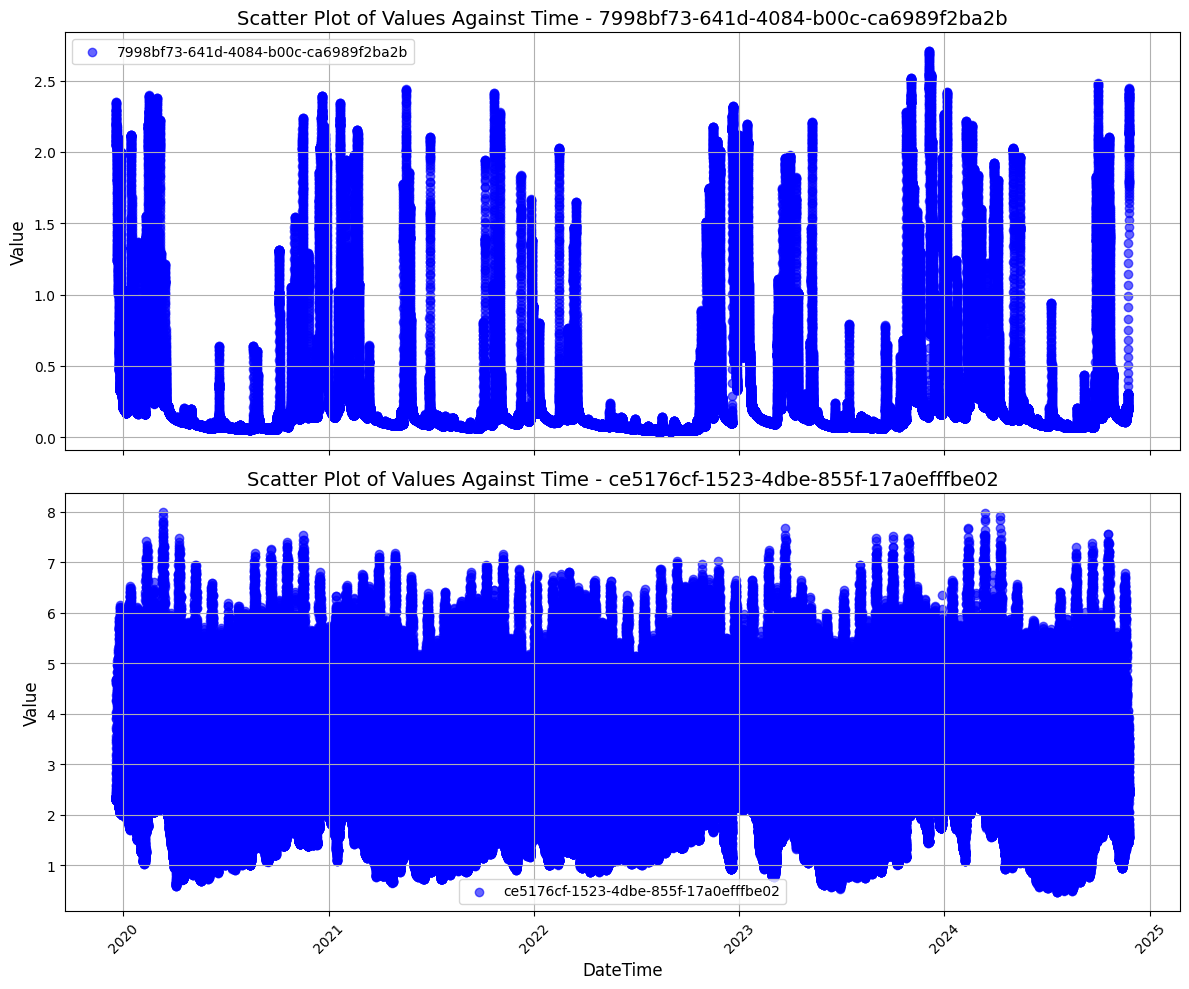

In [0]:
#Create a scatter plot per station of the values against time. 

#Get unique stations.
stations = df['station'].unique()

#Set up figure size based on the number of stations.
fig, axes = plt.subplots(nrows=len(stations), figsize=(12, 5 * len(stations)), sharex=True)

#Create a scatter plot for each station.
for ax, station in zip(axes, stations):
    station_data = df[df['station'] == station]
    ax.scatter(station_data['dateTime'], station_data['value'], alpha=0.6, label=station, color='blue')
    ax.set_title(f'Scatter Plot of Values Against Time - {station}', fontsize=14)
    ax.set_ylabel('Value', fontsize=12)
    ax.legend()
    ax.grid(True)
axes[-1].set_xlabel('DateTime', fontsize=12)
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

#The first station shows highly variable water levels, fluctuating between near zero and 2.5 with intermittent spikes. In contrast, the second station maintains consistently higher water levels (1.0–8.0) with fewer drastic drops, indicating a more stable water body. The first station appears more responsive to rainfall or seasonal changes, while the second exhibits a steadier hydrological pattern with periodic peaks.


In [0]:
df

,measure,date,dateTime,value,quality,station
0,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19 00:00:00,2.078,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
1,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19 00:00:00,4.588,Good,ce5176cf-1523-4dbe-855f-17a0efffbe02
2,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19 00:15:00,4.245,Good,ce5176cf-1523-4dbe-855f-17a0efffbe02
3,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19 00:15:00,2.107,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
4,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19 00:30:00,3.912,Good,ce5176cf-1523-4dbe-855f-17a0efffbe02
...,...,...,...,...,...,...
346171,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-11-24,2024-11-24 23:15:00,2.381,Unchecked,7998bf73-641d-4084-b00c-ca6989f2ba2b
346172,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-11-24,2024-11-24 23:30:00,2.366,Unchecked,7998bf73-641d-4084-b00c-ca6989f2ba2b
346173,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-11-24,2024-11-24 23:30:00,2.542,Good,ce5176cf-1523-4dbe-855f-17a0efffbe02
346174,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-11-24,2024-11-24 23:45:00,2.362,Unchecked,7998bf73-641d-4084-b00c-ca6989f2ba2b


In [0]:
#Investigating the 'quality' counts for each station's data. 
df.groupby('station')['quality'].value_counts(dropna=False)

station                               quality  
7998bf73-641d-4084-b00c-ca6989f2ba2b  Good         172703
                                      Unchecked       385
ce5176cf-1523-4dbe-855f-17a0efffbe02  Good         173088
Name: quality, dtype: int64

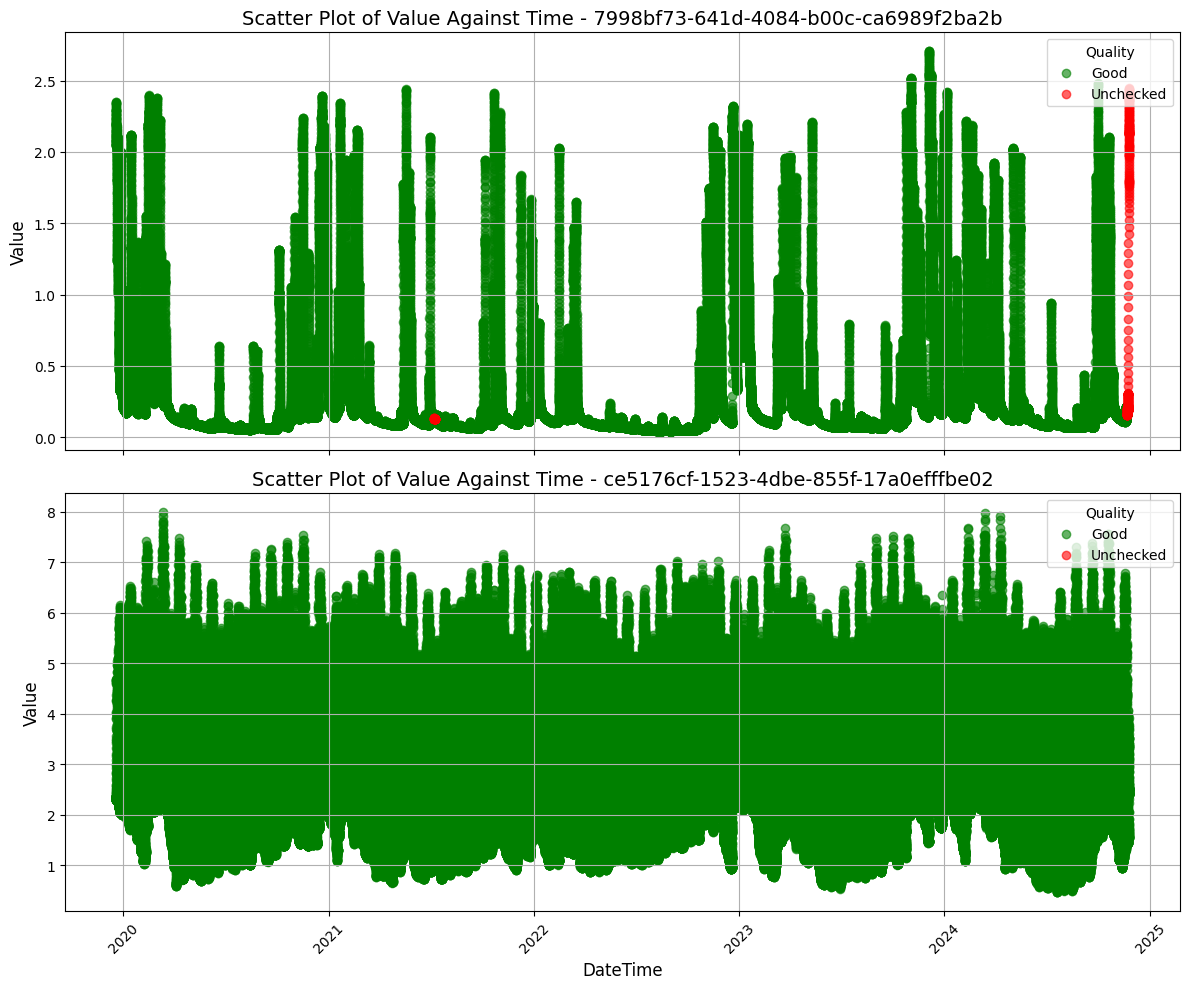

In [0]:
#Get unique stations
stations = df['station'].unique()

#Set up figure size based on the number of stations and define colours for qualities.
fig, axes = plt.subplots(nrows=len(stations), figsize=(12, 5 * len(stations)), sharex=True)
quality_colors = {'Good': 'green','Unchecked': 'red'}

#Create a scatter plot for each station.
for ax, station in zip(axes, stations):
    station_data = df[df['station'] == station]
    
    for quality, color in quality_colors.items():
        quality_data = station_data[station_data['quality'] == quality]
        ax.scatter(quality_data['dateTime'], quality_data['value'], alpha=0.6, label=quality, color=color)
    
    ax.set_title(f'Scatter Plot of Value Against Time - {station}', fontsize=14)
    ax.set_ylabel('Value', fontsize=12)
    ax.legend(title='Quality', loc='upper right')
    ax.grid(True)

axes[-1].set_xlabel('DateTime', fontsize=12)
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

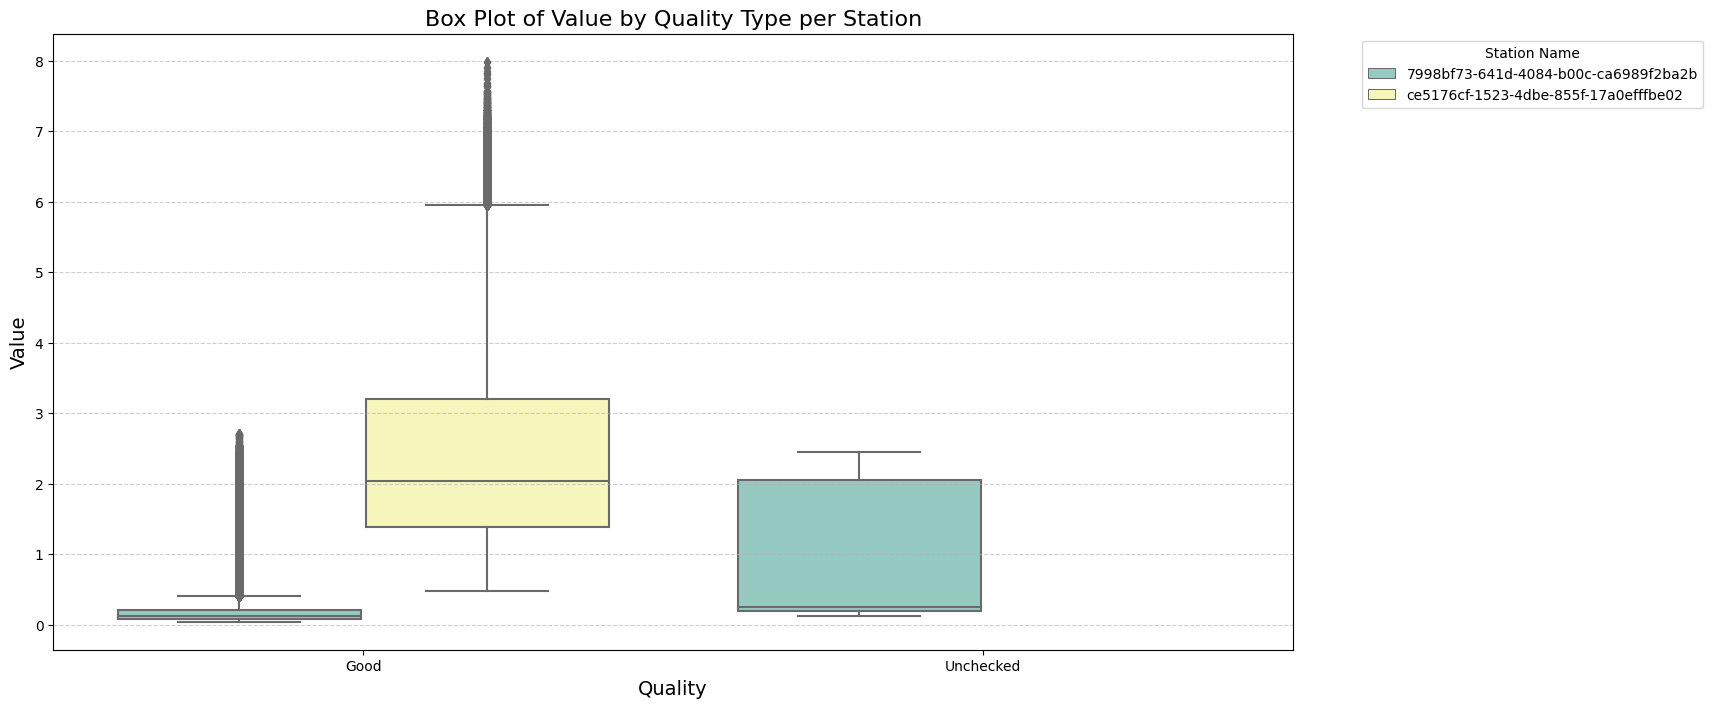

In [0]:
#Create a box plot for each quality type, grouped by station.
plt.figure(figsize=(16, 8))
sns.boxplot(data=df, x='quality', y='value', hue='station', palette="Set3")
plt.title('Box Plot of Value by Quality Type per Station', fontsize=16)
plt.xlabel('Quality', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(title='Station Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#The first station (blue) has consistently lower water levels, with most "Good" values near zero and a few outliers. The second station (yellow) has significantly higher water levels, with a median around 2–3 and outliers reaching above 6. The "Unchecked" values for the first station show a wider spread but remain lower than the second station’s "Good" values. The amount of 'Unchecked' values is relatively low, compared to 'Good' so the sample may not be representative. 

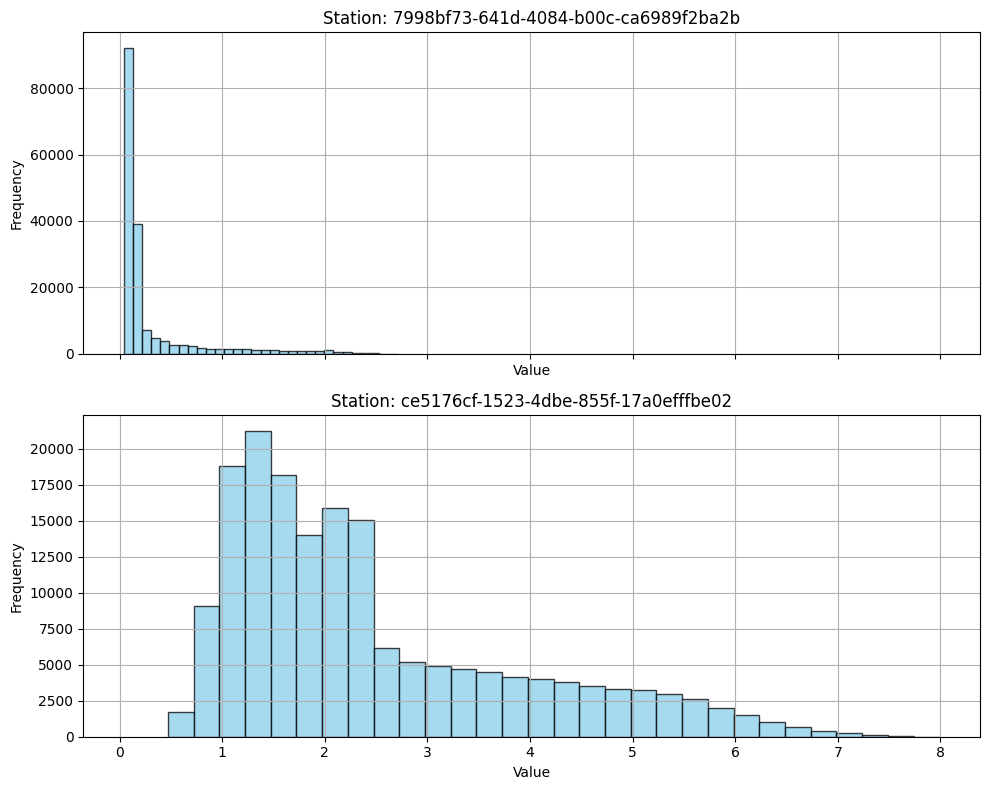

In [0]:
#Checking the distribution of the data by using a histrogram and separating the two stations.

#Get unique station names.
stations = df['station'].unique()
n_stations = len(stations)

#Create subplots: one histogram per station
fig, axes = plt.subplots(n_stations, 1, figsize=(10, 4 * n_stations), sharex=True)

#Plot a histogram for each station.
for ax, station in zip(axes, stations):
    station_data = df[df['station'] == station]['value']
    ax.hist(station_data, bins=30, color='skyblue', edgecolor='black', alpha=0.75)
    ax.set_title(f'Station: {station}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.grid(True)
plt.tight_layout()
plt.show()

#The first station (top) has a highly skewed distribution, with the majority of values concentrated near zero and a sharp drop-off, indicating infrequent higher levels. The second station (bottom) has a more spread-out distribution, with water levels commonly between 1 and 3, gradually decreasing towards 7. This suggests that the first station experiences low water levels most of the time, while the second station maintains higher and more variable water levels.

In [0]:
#Explore the number of nulls in each column. 
print(df.isnull().sum())

measure     0
date        0
dateTime    0
value       0
quality     0
station     0
dtype: int64


In [0]:
#Group by 'station' and 'quality' and calculate some descriptive statistics.
df.groupby(['station', 'quality'])['value'].agg(
    average='mean',
    median='median',
    mode=lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    std_dev='std',
    count='count'
).reset_index()

#The first station has much lower average and median values (0.29 and 0.12 for "Good" data), indicating consistently low water levels. The second station, however, has much higher values (average 2.48, median 2.04), reflecting a more elevated and stable water body. The standard deviation is also higher for the second station, showing greater variability in water levels. The "Unchecked" data for the first station has a higher mean (0.93), but with a very small count (385), making it less representative.

,station,quality,average,median,mode,std_dev,count
0,7998bf73-641d-4084-b00c-ca6989f2ba2b,Good,0.291253,0.123,0.073,0.430857,172703
1,7998bf73-641d-4084-b00c-ca6989f2ba2b,Unchecked,0.935252,0.253,0.193,0.932367,385
2,ce5176cf-1523-4dbe-855f-17a0efffbe02,Good,2.460628,2.037,1.270,1.425709,173088


In [0]:
df

,measure,date,dateTime,value,quality,station
0,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19 00:00:00,2.078,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
1,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19 00:00:00,4.588,Good,ce5176cf-1523-4dbe-855f-17a0efffbe02
2,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19 00:15:00,4.245,Good,ce5176cf-1523-4dbe-855f-17a0efffbe02
3,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19 00:15:00,2.107,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
4,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19 00:30:00,3.912,Good,ce5176cf-1523-4dbe-855f-17a0efffbe02
...,...,...,...,...,...,...
346171,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-11-24,2024-11-24 23:15:00,2.381,Unchecked,7998bf73-641d-4084-b00c-ca6989f2ba2b
346172,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-11-24,2024-11-24 23:30:00,2.366,Unchecked,7998bf73-641d-4084-b00c-ca6989f2ba2b
346173,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-11-24,2024-11-24 23:30:00,2.542,Good,ce5176cf-1523-4dbe-855f-17a0efffbe02
346174,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-11-24,2024-11-24 23:45:00,2.362,Unchecked,7998bf73-641d-4084-b00c-ca6989f2ba2b


### Resample to Hourly for ML Feature Engineering


In [0]:
#Convert the dateTime column to datetime.
df['dateTime'] = pd.to_datetime(df['dateTime'])

#Group by 'station' and resample on 'dateTime' to hour level and keeping the max water level.
df_hourly = df.groupby('station', as_index=False).resample('H', on='dateTime').max()

In [0]:
df_hourly = df_hourly.reset_index()

In [0]:
df_hourly

,level_0,dateTime,measure,date,value,quality,station
0,0,2019-12-19 00:00:00,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2.198,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
1,0,2019-12-19 01:00:00,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2.291,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
2,0,2019-12-19 02:00:00,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2.293,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
3,0,2019-12-19 03:00:00,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2.266,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
4,0,2019-12-19 04:00:00,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2.229,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
...,...,...,...,...,...,...,...
86539,1,2024-11-24 19:00:00,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-11-24,2.520,Good,ce5176cf-1523-4dbe-855f-17a0efffbe02
86540,1,2024-11-24 20:00:00,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-11-24,2.513,Good,ce5176cf-1523-4dbe-855f-17a0efffbe02
86541,1,2024-11-24 21:00:00,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-11-24,2.503,Good,ce5176cf-1523-4dbe-855f-17a0efffbe02
86542,1,2024-11-24 22:00:00,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-11-24,2.506,Good,ce5176cf-1523-4dbe-855f-17a0efffbe02


In [0]:
#Only keep the columns needed for ML. 
df_hourly = df_hourly[['station', 'dateTime', 'value']]
df_hourly

,station,dateTime,value
0,7998bf73-641d-4084-b00c-ca6989f2ba2b,2019-12-19 00:00:00,2.198
1,7998bf73-641d-4084-b00c-ca6989f2ba2b,2019-12-19 01:00:00,2.291
2,7998bf73-641d-4084-b00c-ca6989f2ba2b,2019-12-19 02:00:00,2.293
3,7998bf73-641d-4084-b00c-ca6989f2ba2b,2019-12-19 03:00:00,2.266
4,7998bf73-641d-4084-b00c-ca6989f2ba2b,2019-12-19 04:00:00,2.229
...,...,...,...
86539,ce5176cf-1523-4dbe-855f-17a0efffbe02,2024-11-24 19:00:00,2.520
86540,ce5176cf-1523-4dbe-855f-17a0efffbe02,2024-11-24 20:00:00,2.513
86541,ce5176cf-1523-4dbe-855f-17a0efffbe02,2024-11-24 21:00:00,2.503
86542,ce5176cf-1523-4dbe-855f-17a0efffbe02,2024-11-24 22:00:00,2.506


In [0]:
#Save to CSV.
os.makedirs("Data", exist_ok=True)
df_hourly.to_csv(os.path.join(output_dir, "Level_Cleaned_Hourly.csv"), index=False)
print(f"CSV saved to {os.path.abspath(output_path)}")

CSV saved to /Workspace/Users/luke.male@environment-agency.gov.uk/Reduced Scope Flooding Work/*** ML Flood Prediction/API Imports and Data/Flood Warning Predictor/Data/Level_Cleaned_Hourly.csv
